In [1]:
import requests
import pandas as pd
import statistics as st
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl

# set default dpi to 300
mpl.rcParams['figure.dpi'] = 300

In [2]:
# import the data combined from weather, energy, and population data
combined_df = pd.read_csv('Resources/combined_data.csv')
combined_df.rename(columns = {'TAVG':'Temperature'}, inplace = True)
combined_df.head()

,Year,Month,State,Temperature,Population,Consumption
0,2001,1,Alabama,41.736,4467634,6.414051e+10
1,2001,2,Alabama,52.996,4467634,5.507025e+10
2,2001,3,Alabama,52.004,4467634,5.705739e+10
3,2001,4,Alabama,64.964,4467634,4.786033e+10
4,2001,5,Alabama,71.092,4467634,6.004433e+10


In [3]:
# calculate energy per person
combined_df['Energy per Person'] = combined_df['Consumption'] / combined_df['Population']
combined_df.head()

,Year,Month,State,Temperature,Population,Consumption,Energy per Person
0,2001,1,Alabama,41.736,4467634,6.414051e+10,14356.706327
1,2001,2,Alabama,52.996,4467634,5.507025e+10,12326.489885
2,2001,3,Alabama,52.004,4467634,5.705739e+10,12771.275951
3,2001,4,Alabama,64.964,4467634,4.786033e+10,10712.679960
4,2001,5,Alabama,71.092,4467634,6.004433e+10,13439.850849


In [4]:
# create a weight for each row state population/total population
# build total population series for each month
population_totals = combined_df.groupby(['Year', 'Month'])['Population'].sum()

# merge the data back into the dataset
combined_df = combined_df.merge(population_totals, on=['Year', 'Month'])
combined_df.rename(columns = {'Population_x':'Population', 'Population_y':'Total Population'}, inplace = True)

# create a percent of total population column to use as a weight
combined_df['Weight'] = combined_df['Population'] / combined_df['Total Population']

combined_df

,Year,Month,State,Temperature,Population,Consumption,Energy per Person,Total Population,Weight
0,2001,1,Alabama,41.736,4467634,6.414051e+10,14356.706327,284968955,0.015678
1,2001,1,Alaska,21.092,633714,5.692772e+09,8983.188315,284968955,0.002224
2,2001,1,Arizona,43.772,5273477,4.213304e+10,7989.613251,284968955,0.018505
3,2001,1,Arkansas,36.656,2691571,2.796406e+10,10389.492669,284968955,0.009445
4,2001,1,California,44.316,34479458,1.047889e+11,3039.169663,284968955,0.120994
...,...,...,...,...,...,...,...,...,...
4279,2007,12,Virginia,41.064,7751000,2.937967e+10,3790.436643,301231207,0.025731
4280,2007,12,Washington,34.392,6461587,1.622488e+10,2510.974137,301231207,0.021451
4281,2007,12,West Virginia,36.744,1834052,6.150771e+10,33536.511949,301231207,0.006089
4282,2007,12,Wisconsin,18.092,5610775,4.547159e+10,8104.332626,301231207,0.018626


In [5]:
# Calculate weighted power and temperature values
combined_df['Weighted Temperature'] = combined_df['Temperature'] * combined_df['Weight']
combined_df['Weighted Energy'] = combined_df['Energy per Person'] * combined_df['Weight']
combined_df.head()

,Year,Month,State,Temperature,Population,Consumption,Energy per Person,Total Population,Weight,Weighted Temperature,Weighted Energy
0,2001,1,Alabama,41.736,4467634,6.414051e+10,14356.706327,284968955,0.015678,0.654321,225.078936
1,2001,1,Alaska,21.092,633714,5.692772e+09,8983.188315,284968955,0.002224,0.046904,19.976815
2,2001,1,Arizona,43.772,5273477,4.213304e+10,7989.613251,284968955,0.018505,0.810020,147.851340
3,2001,1,Arkansas,36.656,2691571,2.796406e+10,10389.492669,284968955,0.009445,0.346221,98.130188
4,2001,1,California,44.316,34479458,1.047889e+11,3039.169663,284968955,0.120994,5.361958,367.720486


In [6]:
# source: https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas
# add a date column
combined_df['Date'] = pd.to_datetime(combined_df['Year']*10000+combined_df['Month']*100+15,format='%Y%m%d')
combined_df

,Year,Month,State,Temperature,Population,Consumption,Energy per Person,Total Population,Weight,Weighted Temperature,Weighted Energy,Date
0,2001,1,Alabama,41.736,4467634,6.414051e+10,14356.706327,284968955,0.015678,0.654321,225.078936,2001-01-15
1,2001,1,Alaska,21.092,633714,5.692772e+09,8983.188315,284968955,0.002224,0.046904,19.976815,2001-01-15
2,2001,1,Arizona,43.772,5273477,4.213304e+10,7989.613251,284968955,0.018505,0.810020,147.851340,2001-01-15
3,2001,1,Arkansas,36.656,2691571,2.796406e+10,10389.492669,284968955,0.009445,0.346221,98.130188,2001-01-15
4,2001,1,California,44.316,34479458,1.047889e+11,3039.169663,284968955,0.120994,5.361958,367.720486,2001-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,2007,12,Virginia,41.064,7751000,2.937967e+10,3790.436643,301231207,0.025731,1.056620,97.531975,2007-12-15
4280,2007,12,Washington,34.392,6461587,1.622488e+10,2510.974137,301231207,0.021451,0.737729,53.861876,2007-12-15
4281,2007,12,West Virginia,36.744,1834052,6.150771e+10,33536.511949,301231207,0.006089,0.223717,204.187698,2007-12-15
4282,2007,12,Wisconsin,18.092,5610775,4.547159e+10,8104.332626,301231207,0.018626,0.336984,150.952444,2007-12-15


In [7]:
# create a series of weighted energy by date
energy_by_date = combined_df.groupby('Date')['Weighted Energy'].sum()
energy_by_date.head()

Date
2001-01-15    7939.798218
2001-02-15    6668.071497
2001-03-15    7083.863270
2001-04-15    6628.745333
2001-05-15    7212.832371
Name: Weighted Energy, dtype: float64

In [8]:
# create a series of weighted temperature by date
temp_by_date = combined_df.groupby('Date')['Weighted Temperature'].sum()
temp_by_date.head()

Date
2001-01-15    34.348641
2001-02-15    38.844089
2001-03-15    43.380498
2001-04-15    55.736487
2001-05-15    64.790428
Name: Weighted Temperature, dtype: float64

In [9]:
# cobined the temeprature and energy into a dataframe
us_energy_temp = pd.DataFrame(dict(Temperature = temp_by_date, Energy = energy_by_date)).reset_index()
us_energy_temp.rename(columns={'Energy' : 'Energy per Person'}, inplace=True)
us_energy_temp.head()

,Date,Temperature,Energy per Person
0,2001-01-15,34.348641,7939.798218
1,2001-02-15,38.844089,6668.071497
2,2001-03-15,43.380498,7083.863270
3,2001-04-15,55.736487,6628.745333
4,2001-05-15,64.790428,7212.832371


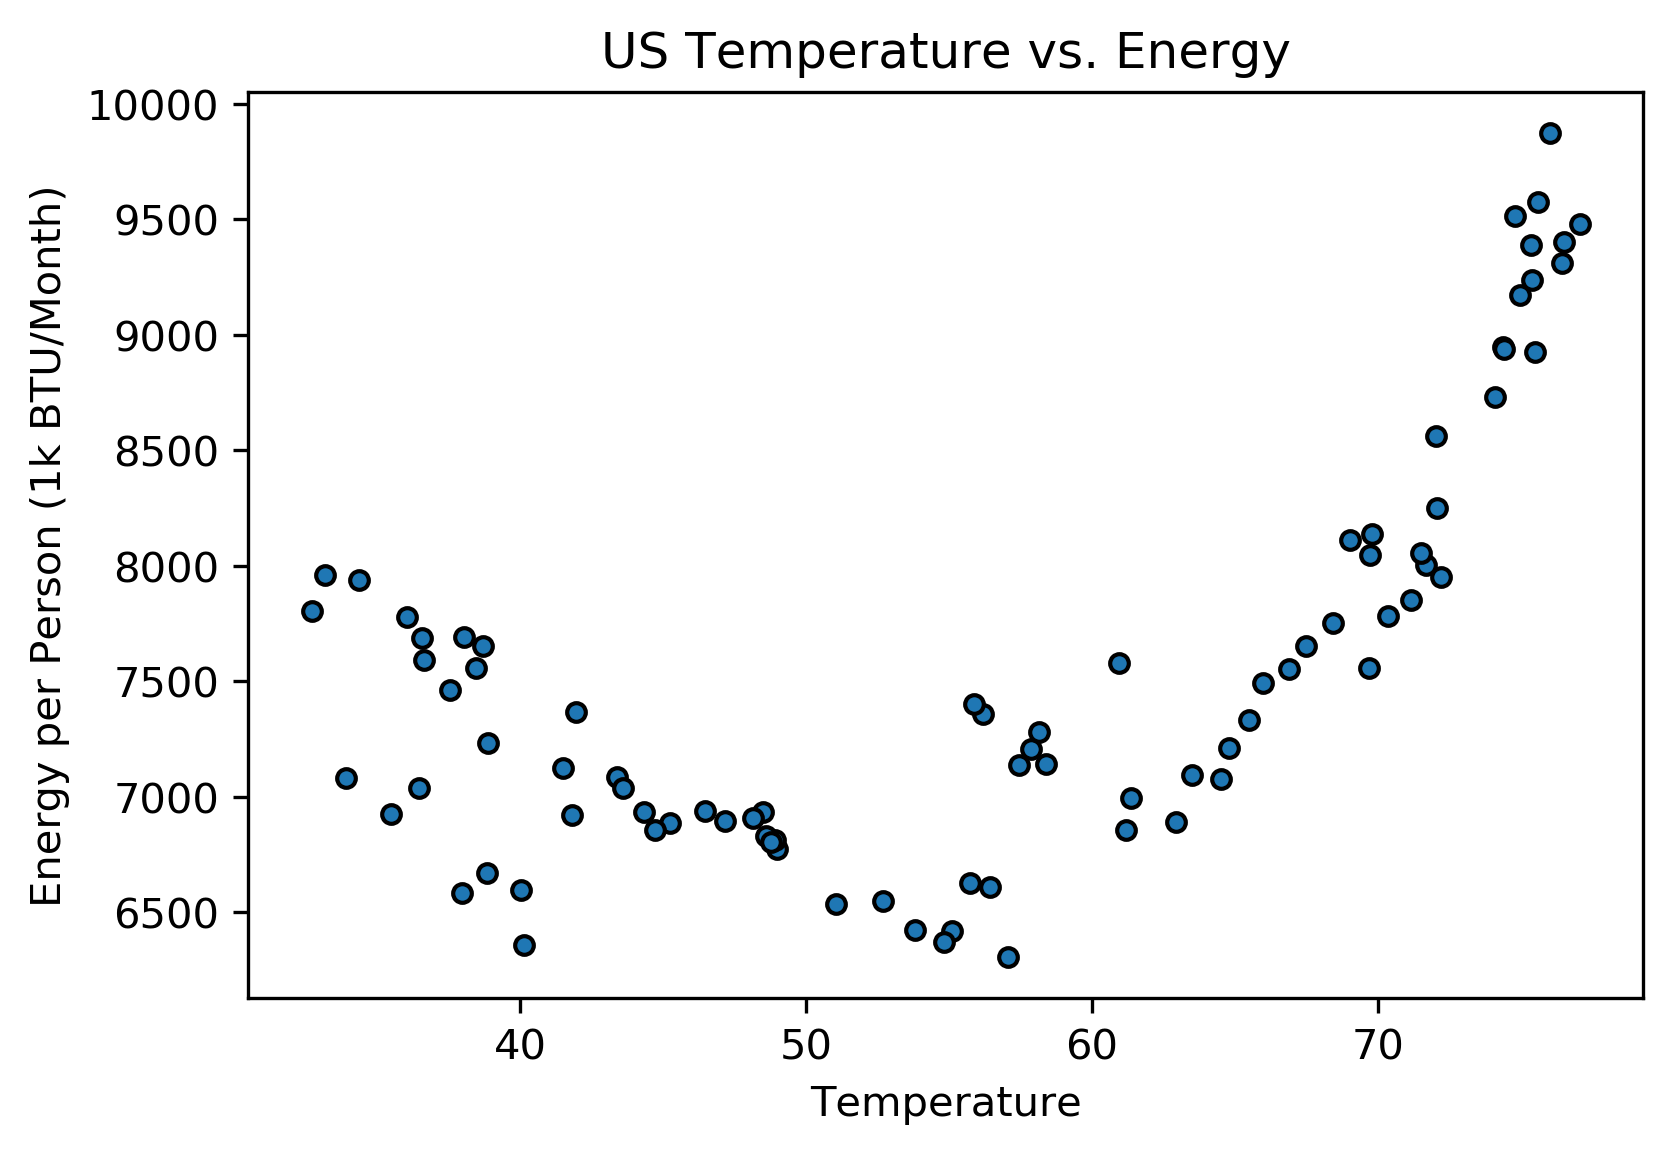

In [10]:
# plot energy vesrus temperature
title = 'US Temperature vs. Energy'
ax = us_energy_temp.plot(kind='scatter', 
                         x='Temperature', 
                         y='Energy per Person',
                         title= title,
                         edgecolors= 'black')
ax.set_ylabel('Energy per Person (1k BTU/Month)')
ax.figure.savefig(f'Images/{title}.png', dpi=300)

In [11]:
# Generate a mean temperature to compare individual temeratures to and populate their values
mean_temp = combined_df['Temperature'].mean()
combined_df['Temp Difference'] = abs(combined_df['Temperature'] - mean_temp)
combined_df['Weighted Temp Diff'] = combined_df['Temp Difference'] * combined_df['Weight']
combined_df.head()

,Year,Month,State,Temperature,Population,Consumption,Energy per Person,Total Population,Weight,Weighted Temperature,Weighted Energy,Date,Temp Difference,Weighted Temp Diff
0,2001,1,Alabama,41.736,4467634,6.414051e+10,14356.706327,284968955,0.015678,0.654321,225.078936,2001-01-15,11.647634,0.182607
1,2001,1,Alaska,21.092,633714,5.692772e+09,8983.188315,284968955,0.002224,0.046904,19.976815,2001-01-15,32.291634,0.071810
2,2001,1,Arizona,43.772,5273477,4.213304e+10,7989.613251,284968955,0.018505,0.810020,147.851340,2001-01-15,9.611634,0.177868
3,2001,1,Arkansas,36.656,2691571,2.796406e+10,10389.492669,284968955,0.009445,0.346221,98.130188,2001-01-15,16.727634,0.157995
4,2001,1,California,44.316,34479458,1.047889e+11,3039.169663,284968955,0.120994,5.361958,367.720486,2001-01-15,9.067634,1.097127


In [12]:
# Build table to compare temperature difference from mean by energy usage
temp_diff_by_date = combined_df.groupby('Date')['Weighted Temp Diff'].sum()
us_power_temp_diff = pd.DataFrame(dict(TempDiff = temp_diff_by_date, Energy = energy_by_date)).reset_index()
us_power_temp_diff.rename(columns={'TempDiff':'Temperature Difference', 'Energy' : 'Energy per Person'}, inplace=True)
us_power_temp_diff.head()

,Date,Temperature Difference,Energy per Person
0,2001-01-15,19.291453,7939.798218
1,2001-02-15,16.263642,6668.071497
2,2001-03-15,11.902457,7083.863270
3,2001-04-15,6.824469,6628.745333
4,2001-05-15,11.459616,7212.832371


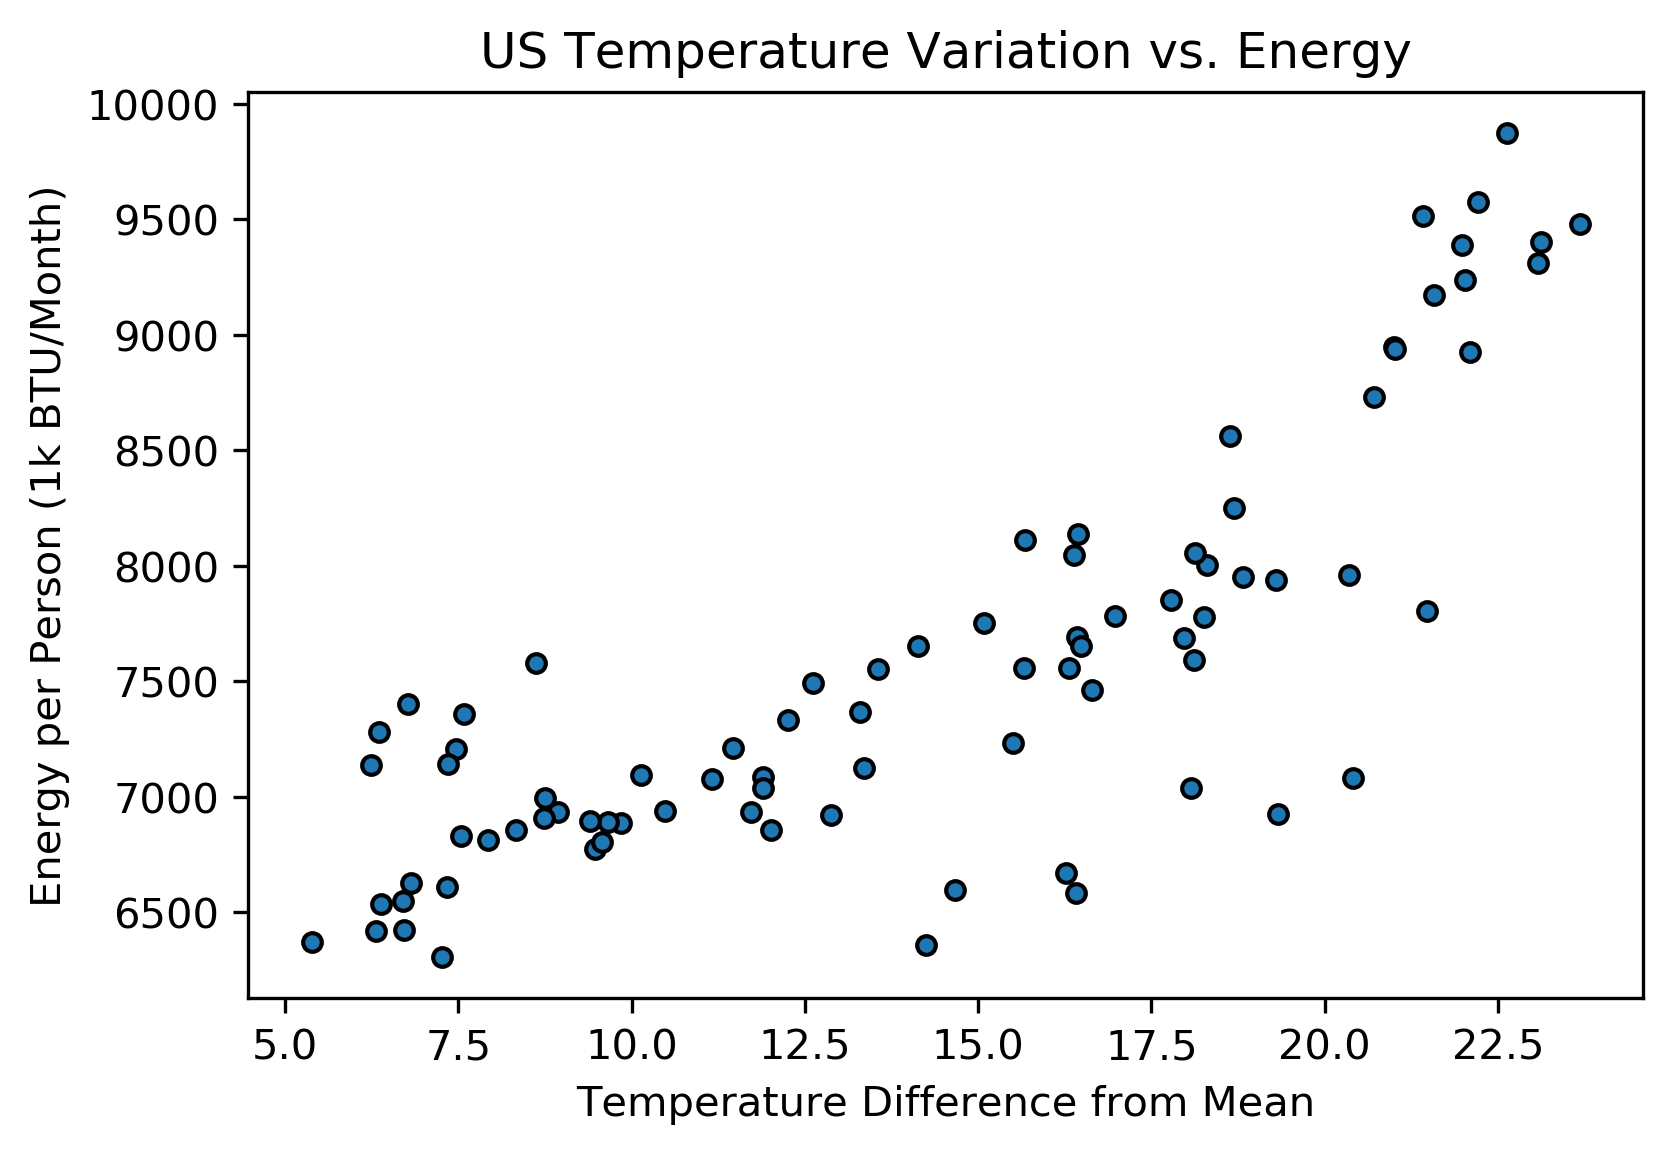

In [13]:
ax = us_power_temp_diff.plot(kind='scatter', 
                        x='Temperature Difference', 
                        y='Energy per Person', 
                        title='US Temperature Variation vs. Energy', 
                        edgecolors= 'black')
ax.set_ylabel('Energy per Person (1k BTU/Month)')
ax.set_xlabel('Temperature Difference from Mean')
ax.figure.savefig('Images/US Temperature Variation vs. Energy.png', dpi=300)

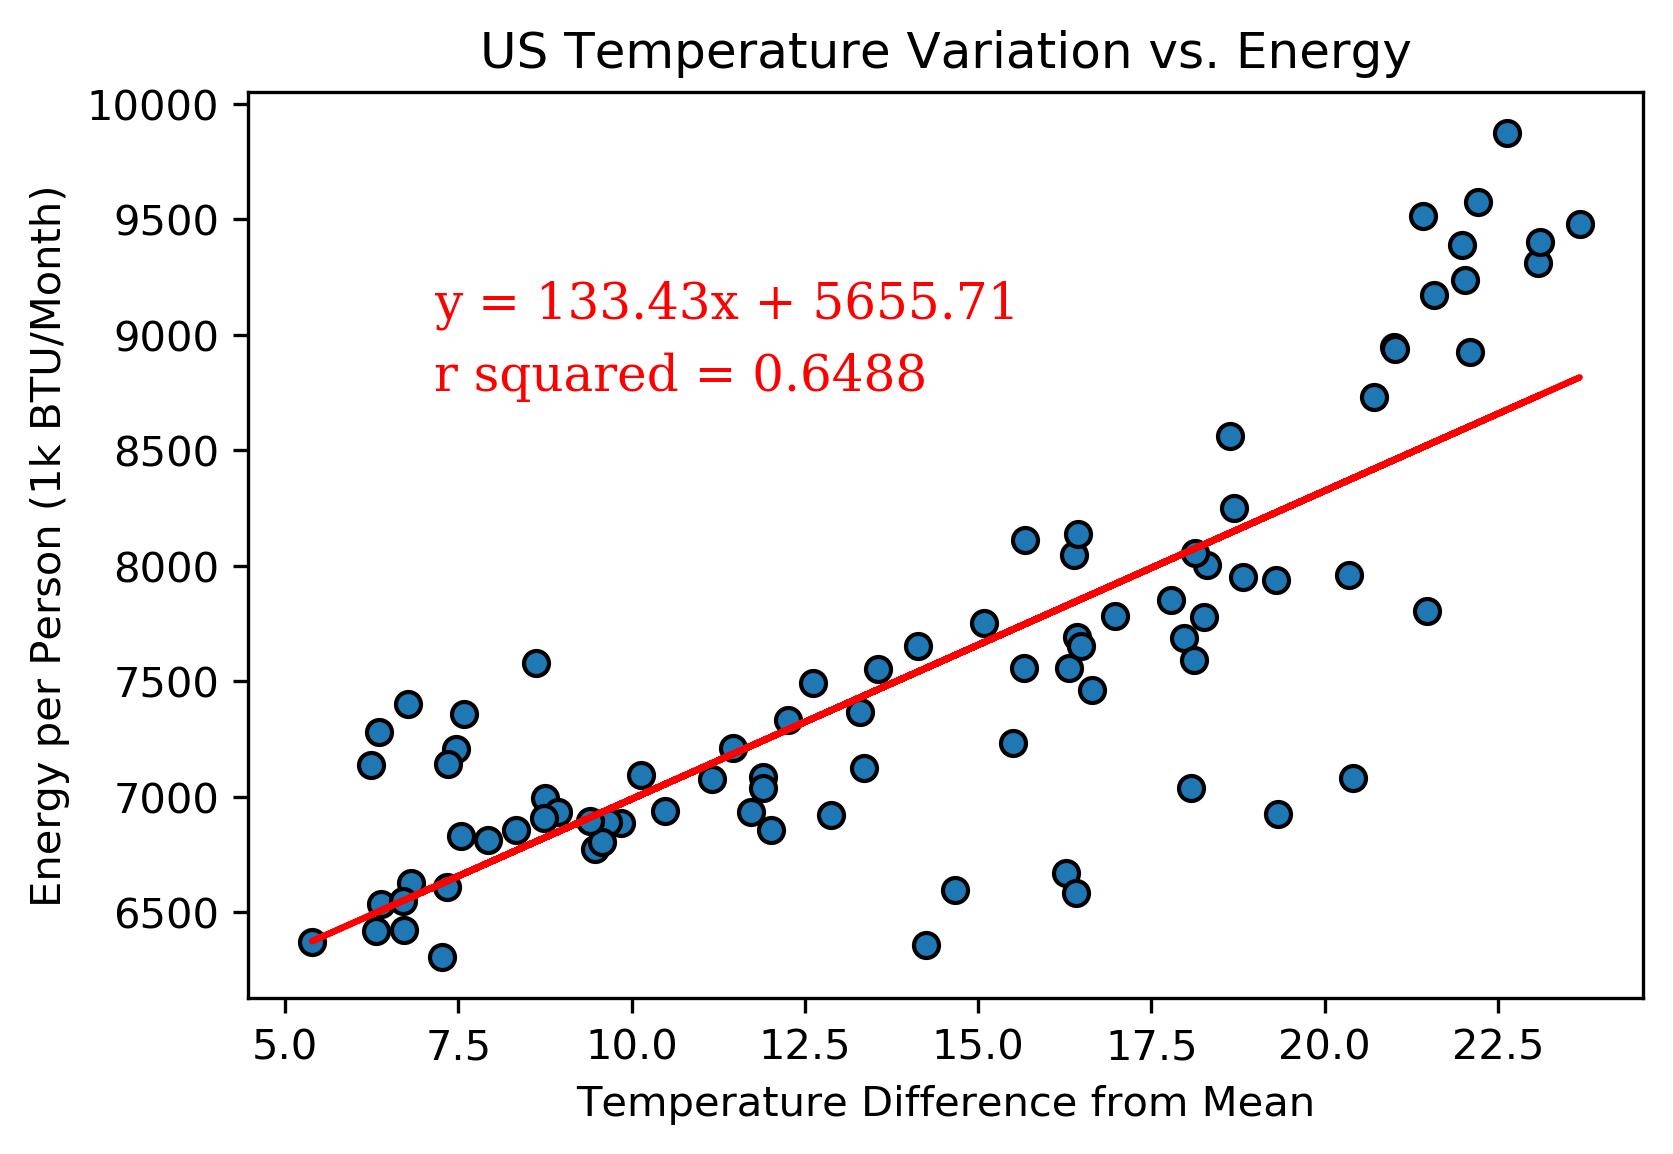

In [21]:
# linear regression model
x = us_power_temp_diff['Temperature Difference'].values.reshape(-1, 1)  # values converts it into a numpy array
y = us_power_temp_diff['Energy per Person'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions
equation = f'y = {round(linear_regressor.coef_[0][0], 2)}x + {round(linear_regressor.intercept_[0], 2)}'
r2 = linear_regressor.score(x, y)


# plot of the liner regression
font = {'family': 'serif',
        'color':  'red',
        'weight': 'normal',
        'size': 12,
        }
plt.scatter(x, y, edgecolors='black')
plt.plot(x, y_pred, color='red', visible=True)
plt.xlabel('Temperature Difference from Mean')
plt.ylabel('Energy per Person (1k BTU/Month)')
plt.title('US Temperature Variation vs. Energy')
plt.text(0.15, .80,equation, ha='left', va='top', transform=ax.transAxes, fontdict=font)
plt.text(0.15, .72,f"r squared = {round(r2, 4)}", ha='left', va='top', transform=ax.transAxes, fontdict=font)
plt.savefig('Images/US Temperature vs. Energy - LR.png', dpi=300)